In [57]:
# 1. import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# 2. Load Data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/country_wise_latest.csv')
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

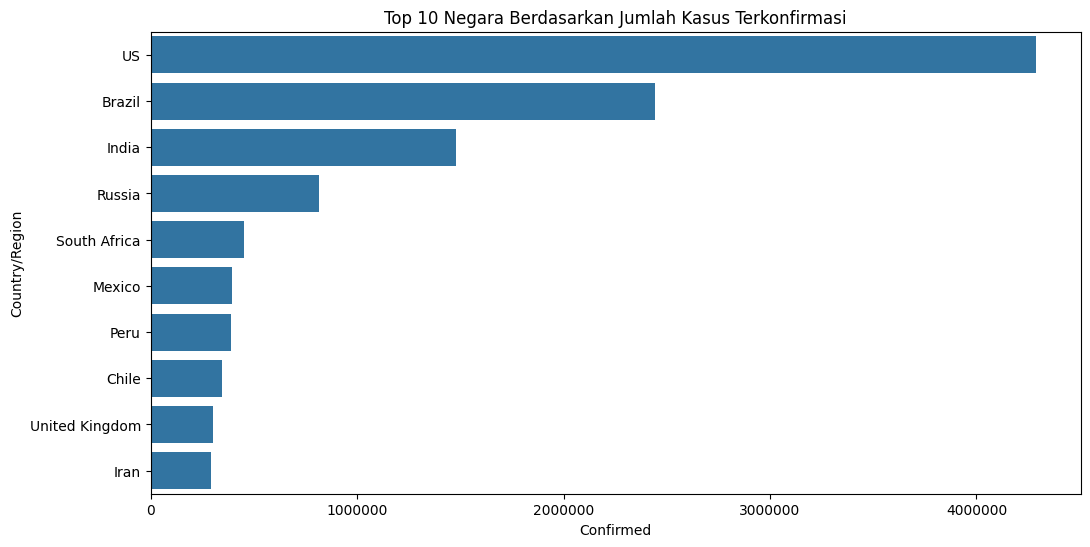

In [59]:
# Top 10 berdasarkan kasus terkonfirmasi
top_10_confirmed = df.nlargest(10, 'Confirmed')

# Buat visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_confirmed, x='Confirmed', y='Country/Region')
plt.title('Top 10 Negara Berdasarkan Jumlah Kasus Terkonfirmasi')
plt.ticklabel_format(style='plain', axis='x')  # Supaya tidak pakai notasi ilmiah
plt.show()

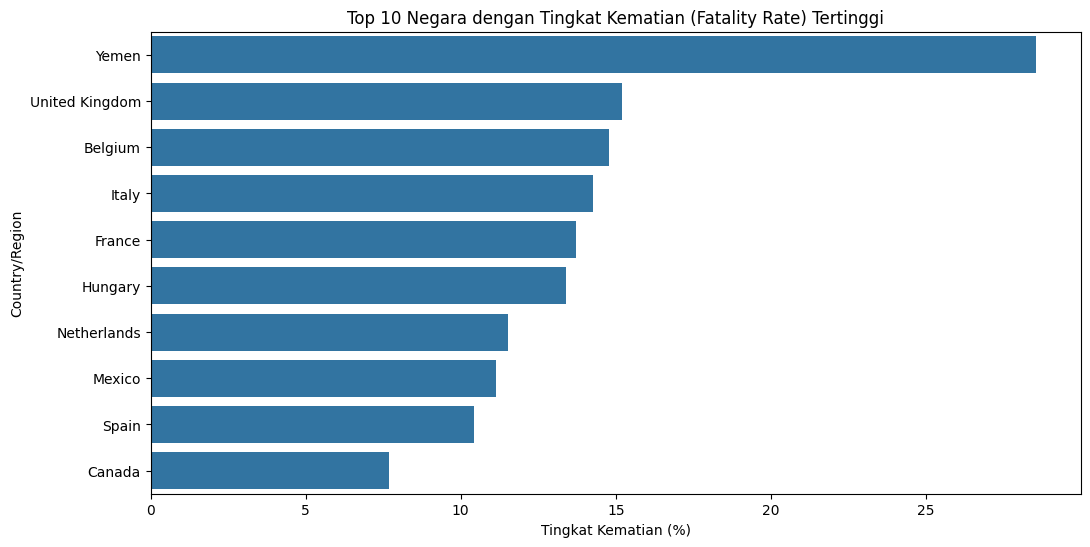

In [60]:
# Hitung fatality rate, hindari pembagian dengan nol
df['Fatality_Rate'] = (df['Deaths'] / df['Confirmed']) * 100

# Ambil Top 10 negara dengan fatality rate tertinggi (yang kasusnya signifikan, misal >1000)
top_10_fatality = df[df['Confirmed'] > 1000].nlargest(10, 'Fatality_Rate')

# Buat visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_fatality, x='Fatality_Rate', y='Country/Region')
plt.title('Top 10 Negara dengan Tingkat Kematian (Fatality Rate) Tertinggi')
plt.xlabel('Tingkat Kematian (%)')
plt.show()

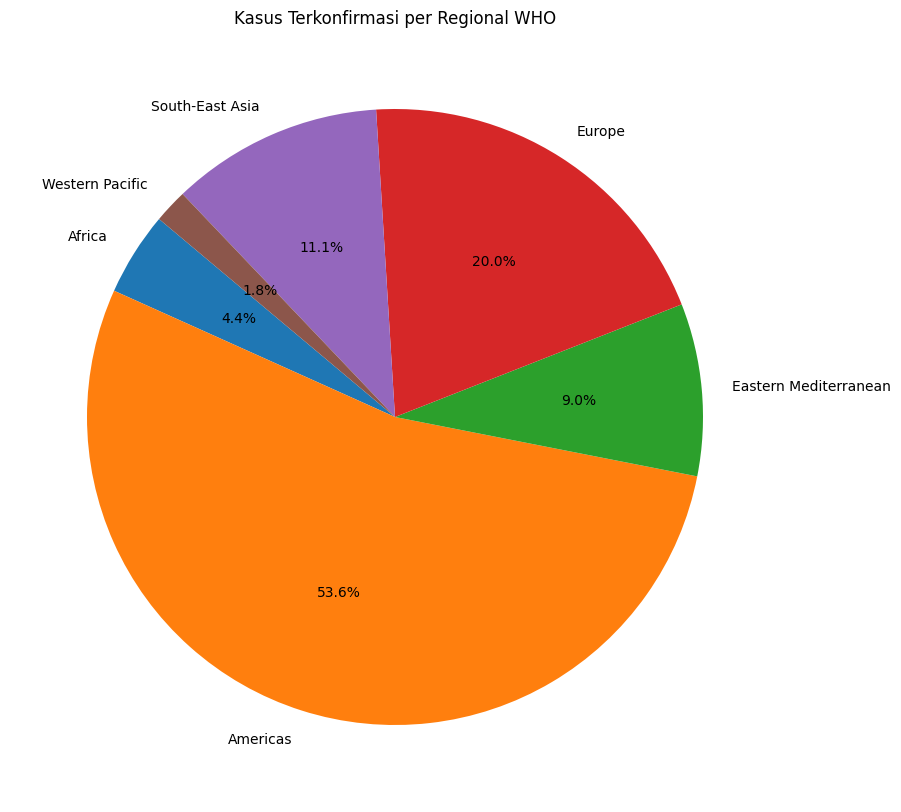

In [61]:
regional_data = df.groupby('WHO Region').sum()[['Confirmed', 'Deaths', 'Recovered']]

# Visualisasi dengan Pie Chart
plt.figure(figsize=(10, 10))
plt.pie(regional_data['Confirmed'], labels=regional_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Kasus Terkonfirmasi per Regional WHO')
plt.show()